In [5]:
import numpy
import pandas
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  mean_squared_error, r2_score

In [2]:
# load dataset
dataframe = pandas.read_csv("housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
y = dataset[:,13]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
estimator =  MLPRegressor(random_state=7, hidden_layer_sizes=(13,6), activation='relu', solver='adam', max_iter=10000)
estimator.fit(X_train, y_train)

pred_y = estimator.predict(X_test)
r2 = r2_score( y_test, pred_y )
mse = mean_squared_error(y_test, pred_y)
print('r2= ', r2)
print('mse= ', mse)

r2=  0.79075032266
mse=  16.1254256975


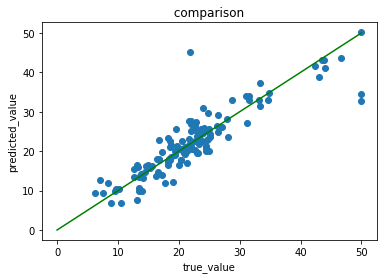

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(y_test, pred_y)
plt.plot([0, 50], [0, 50], 'g-', label='true line')
plt.xlabel('true_value')
plt.ylabel('predicted_value')
plt.title(' comparison ')
plt.show()